## ZOMATAO DATA ANALYSIS

# Importing Libraries:

In [1]:
import numpy as np  #used for numerical operation
import pandas as pd #used for data manipulation and analysis
import matplotlib.pyplot as plt  #used for data visualization
import seaborn as sns #used for data visualization

Creating DataFrame(df)

In [2]:
df = pd.read_csv(r"E:\Zomata Data Analysis\Files\Zomato data .csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
df.head() #TOp 5 entries

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
df.info() #Checking Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


<Axes: >

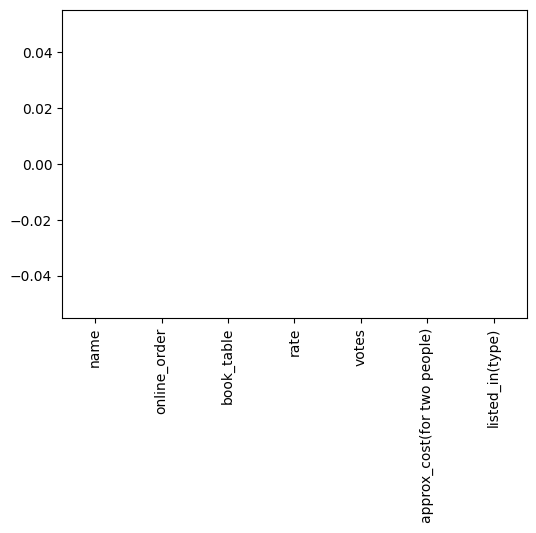

In [5]:
#Checking for any missing values
df.isnull().sum().plot(kind="bar", figsize=(6,4))
# if we have missing data in column it will be shown in the bar chart, if there is no missing data, the bar chart will be empty.

Converting Data type of column rate now

In [6]:
def changeRate(val):
    val = str(val).split("/")
    val = val[0]
    return float (val)

df['rate'] = df['rate'].apply(changeRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Question 1:

Analyze and find what type of restaurant do the majority of the customers order from!

In [7]:
#Firstly let's check for the types of restaurants present
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Count of restaurants')

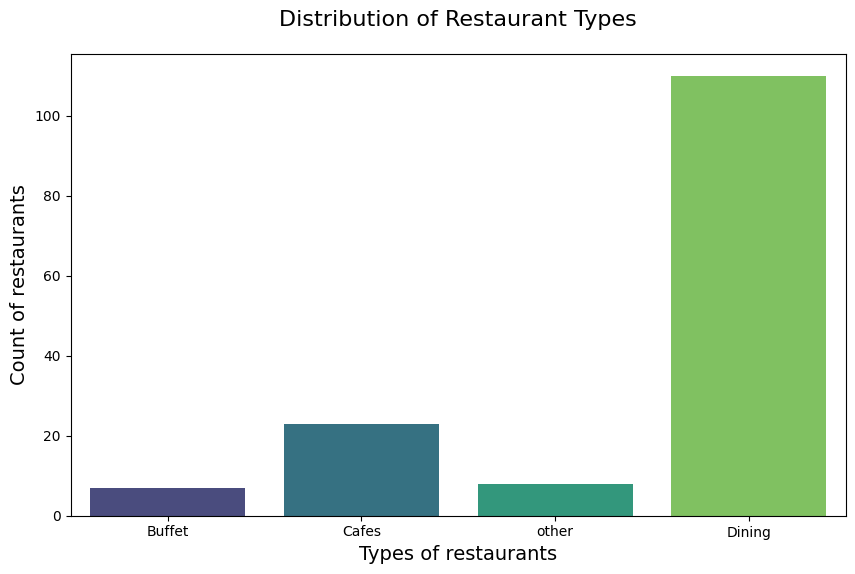

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["listed_in(type)"], hue=df["listed_in(type)"], palette='viridis', legend=False)
plt.title("Distribution of Restaurant Types", fontsize=16, pad=20)
plt.xlabel("Types of restaurants", fontsize=14)
plt.ylabel("Count of restaurants", fontsize=14)

 Conclusion: Majority of the restaurants falls under Dining Category

Question 2:

Analyze how many votes has each type of restaurant received from customers. Find Maximum and Minimum votes received by each type of restaurant.

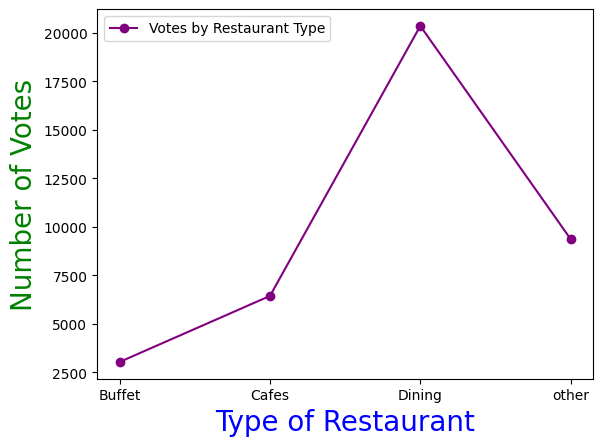

In [9]:
group_data = df.groupby("listed_in(type)")["votes"].sum()
res = pd.DataFrame({"votes": group_data})
plt.plot(res, color="purple", marker="o", label="Votes by Restaurant Type")
plt.xlabel("Type of Restaurant", color="Blue", size=20)
plt.ylabel("Number of Votes", color="Green", size=20)
plt.legend()


Conclusion: Restaurant that falls under Dining category received Maximum votes, 

Maximum votes -> Dining 

Minimum votes -> Buffet

Question 3:

Find out the ratings that majority of the restaurants have received.

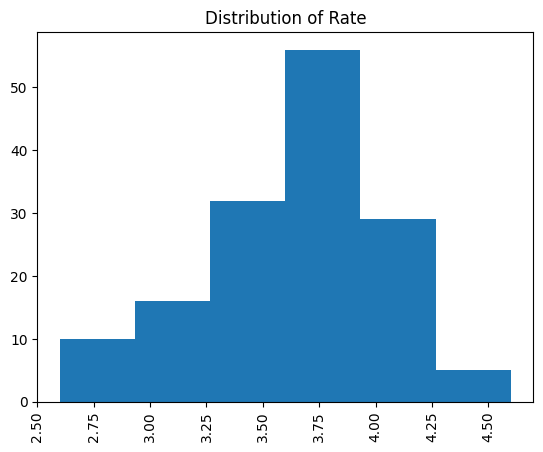

In [10]:
plt.hist(df["rate"],bins=6)
plt.title("Distribution of Rate")
plt.xticks(rotation=90)
plt.show()

Conclusion: Majority of the restaurants received rating from 3.6 to 4.1

Question 4:

It's been observed that most couples order most of their food online. Examine their average spending on each order.

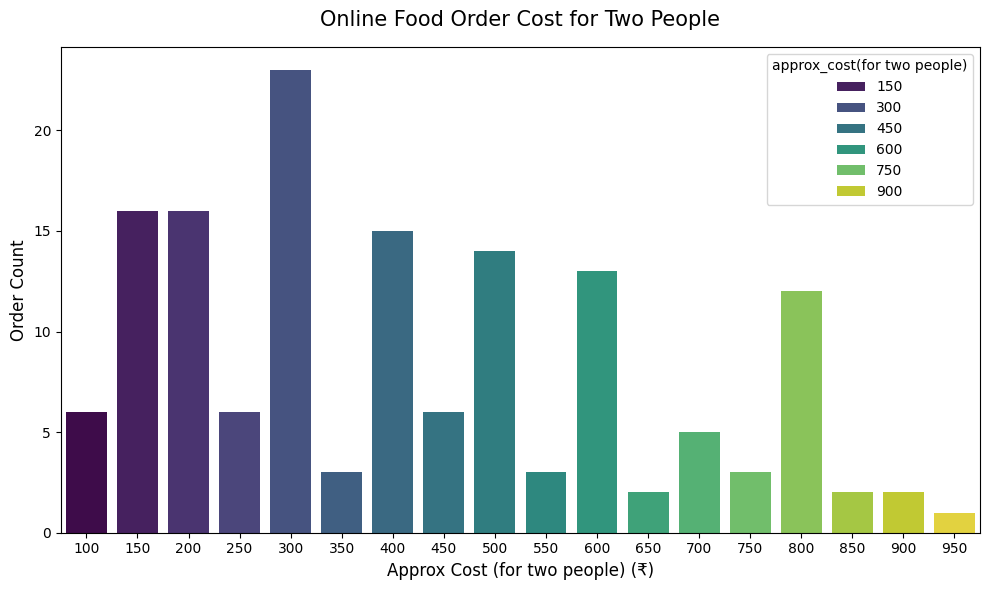

In [11]:
plt.figure(figsize=(10,6))
couple_data = df["approx_cost(for two people)"]
sns.countplot(x=couple_data, hue=couple_data, palette="viridis")
plt.title("Online Food Order Cost for Two People", fontsize=15, pad=15)
plt.xlabel("Approx Cost (for two people) (₹)", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.tight_layout() #Tight layout to prevent label cutoff

Conclusion: So from above we can say that majority of the couple preferred restaurants with approximate price of 300 rupees.

Question 5:

Analyze which mode (offline or online) has received the maximum rating.

Text(0, 0.5, 'Rating')

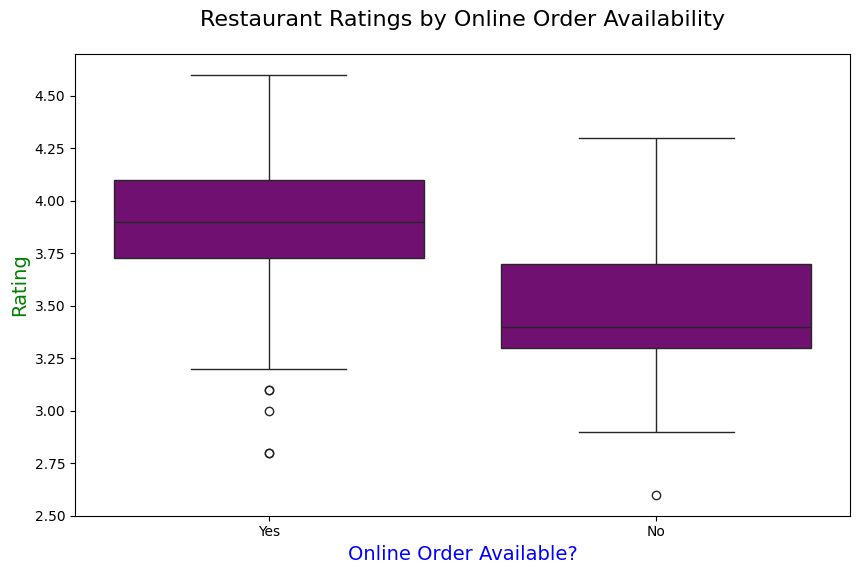

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="online_order", y="rate", data=df, color="purple")

plt.title("Restaurant Ratings by Online Order Availability", fontsize=16, pad=20)
plt.xlabel("Online Order Available?", color="blue", fontsize=14)
plt.ylabel("Rating", color="green", fontsize=14)
#Optional
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

Conclusion: From above we can say that offline order received lower rating than online order.

Question 6:

Analyze and find which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers.

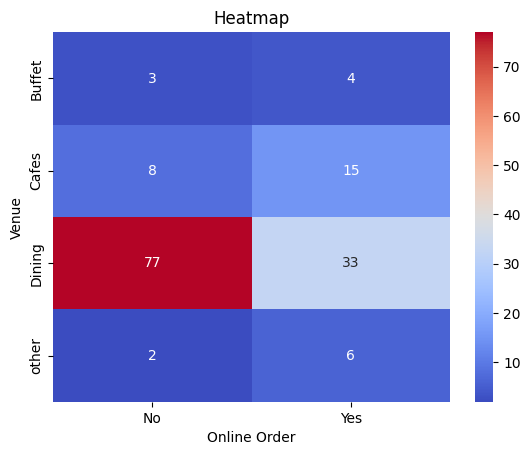

In [13]:
pivot_table = df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Venue")
plt.show()

Conclusion: From above we can say Dining restaurants accept offline orders more and wheras Cafes accept online order more. This suggests that customers prefers to order food offline more but prefers to order online in Cafes.

Question 7:

Which restaurant chains have the most outlets listed on Zomato?

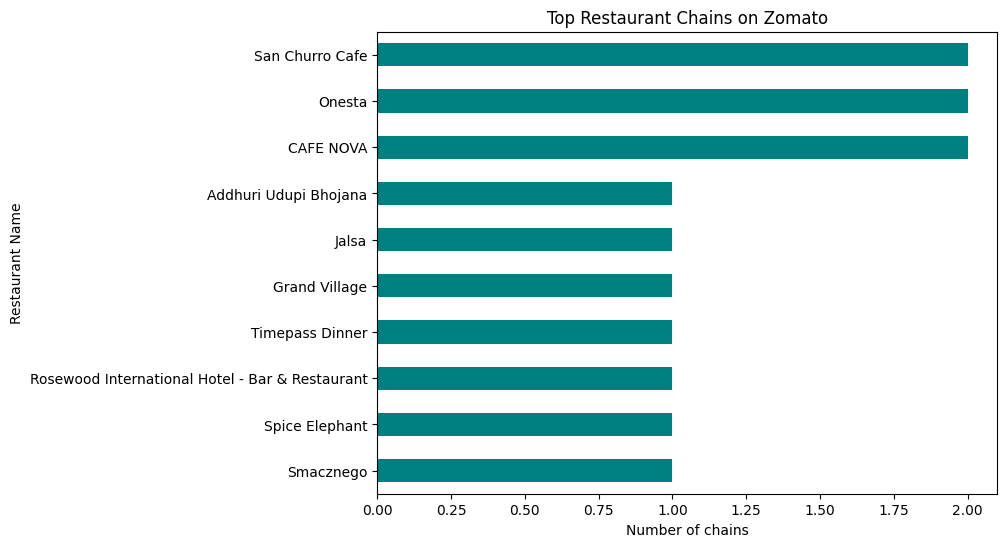

In [14]:
# Count restaurants by name
plt.figure(figsize=(8, 6))
restaurant_chains = df['name'].value_counts().head(10)
restaurant_chains.plot(kind='barh', color='teal')
plt.xlabel("Number of chains", fontsize=10)
plt.ylabel("Restaurant Name", fontsize=10)
plt.title("Top Restaurant Chains on Zomato")
plt.gca().invert_yaxis()
plt.show()

Conclusion: San Churro Cafe, Onesta, and CAFE NOVA tie for the most outlets (2 each) among the top 10 chains listed on Zomato.

Question 8: 

Is there any visible correlation between number of votes and restaurant rating?

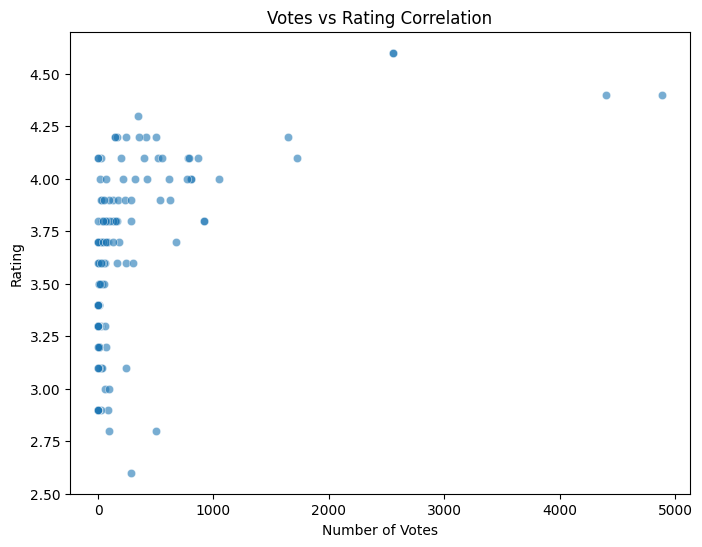

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.6)
plt.title("Votes vs Rating Correlation")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.show()

Conclusion: The scatter plot shows no strong correlation between the number of votes and restaurant ratings, as high ratings are spread across both low and high vote counts.

Question 9:

Which top 10 outlets have the highest average restaurant ratings?

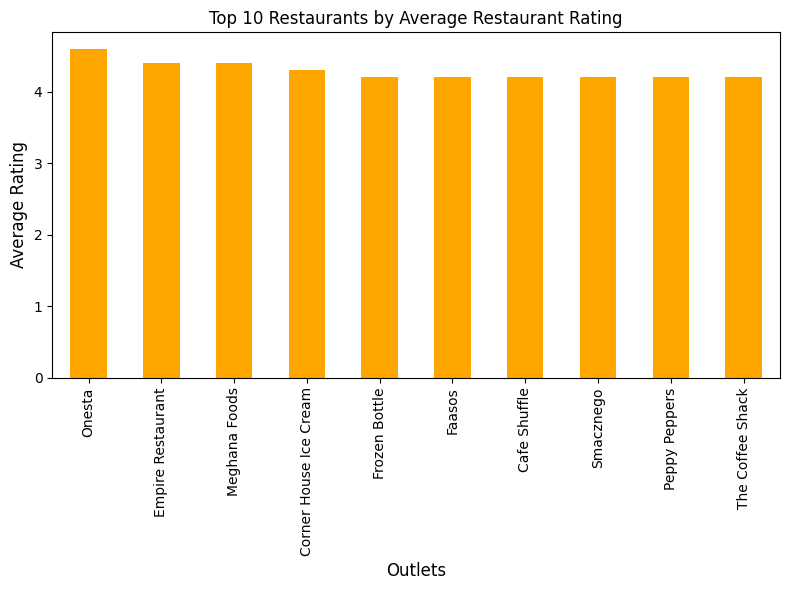

In [16]:
plt.figure(figsize=(8, 6))
avg_ratings_by_name = df.groupby('name')['rate'].mean().sort_values(ascending=False).head(10)
avg_ratings_by_name.plot(kind='bar', color='orange')
plt.xlabel("Outlets", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Top 10 Restaurants by Average Restaurant Rating")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Conclusion: Onesta, Enopire Restaurant, and Meghana Foods lead the top 10 highest-rated restaurants, with Onerate having the highest average rating.

Question 10:

Which Outlet tend to be most expensive on average for two people?

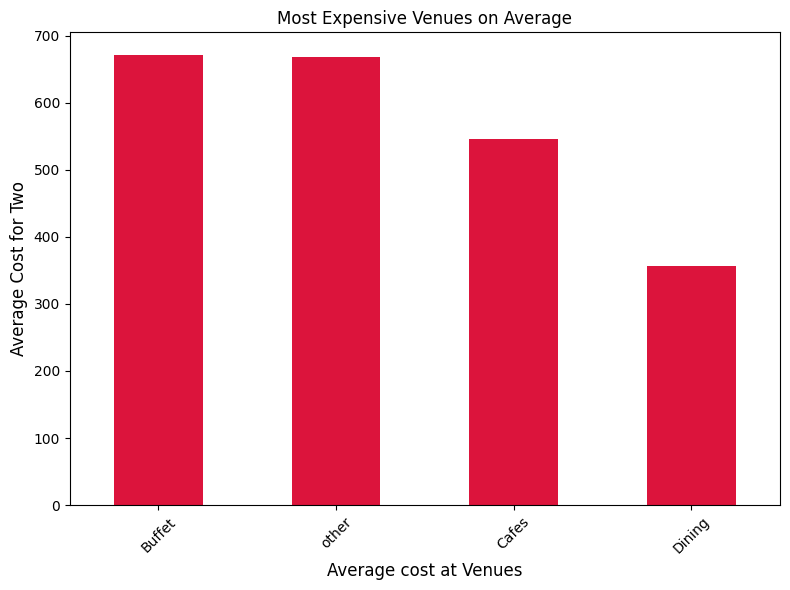

In [17]:
plt.figure(figsize=(8, 6))
df["listed_in(type)"] = df["listed_in(type)"].astype(str)
venue_cost = df.groupby("listed_in(type)")['approx_cost(for two people)'].mean().sort_values(ascending=False).head(10)
venue_cost.plot(kind='bar', color='crimson')
plt.title("Most Expensive Venues on Average")
plt.xlabel("Average cost at Venues", fontsize=12)
plt.ylabel("Average Cost for Two", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion: Buffet venues are the most expensive on average for two people, followed by Dining and Cafes, based on the analyzed data.